# Аналіз даних з Kaggle

У цьому ноутбуці ми проведемо повний цикл аналізу даних з платформи Kaggle.

## 1. Завантаження та попередній перегляд даних

In [3]:
# Імпорт необхідних бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Налаштування відображення графіків
sns.set_theme()  # Правильний виклик через "sns"
sns.set(font_scale=1.2)

# Відображення всіх стовпців датафрейму
pd.set_option('display.max_columns', None)


In [11]:
import pandas as pd
from IPython.display import display

# Завантаження датасету
df = pd.read_csv('C:/practice_4444/Sasha2/practice_3_5/military.csv')

# Перегляд перших рядків датасету
print('Перші 5 рядків датасету:')
display(df.head())

# Інформація про датасет
print('\nІнформація про датасет:')
df.info()

# Статистичний опис числових даних
print('\nСтатистичний опис числових даних:')
display(df.describe())


Перші 5 рядків датасету:


,SR.NO,Country,Active military,Reserve military,Paramilitary,Total,"Per 1,000 capita(active)","Per 1,000 capita(total)"
0,1,Afghanistan,250000,75000,170000,495000,7.2,14.2
1,2,Albania,8000,0,0,8000,2.6,2.6
2,3,Algeria,130000,150000,187200,467200,3.1,11.2
3,4,Angola,107000,0,10000,117000,3.5,3.9
4,5,Antigua and Barbuda,180,80,0,260,1.9,2.7



Інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SR.NO                     172 non-null    int64  
 1   Country                   172 non-null    object 
 2   Active military           172 non-null    int64  
 3   Reserve military          172 non-null    int64  
 4   Paramilitary              172 non-null    int64  
 5   Total                     172 non-null    int64  
 6   Per 1,000 capita(active)  172 non-null    float64
 7   Per 1,000 capita(total)   172 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 10.9+ KB

Статистичний опис числових даних:


,SR.NO,Active military,Reserve military,Paramilitary,Total,"Per 1,000 capita(active)","Per 1,000 capita(total)"
count,172.000000,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,172.000000,172.000000
mean,86.500000,1.187802e+05,1.456982e+05,1.111928e+05,3.756712e+05,4.141860,13.109884
std,49.796252,2.726087e+05,5.175997e+05,5.462052e+05,1.068150e+06,5.463124,29.381642
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,43.750000,8.950000e+03,0.000000e+00,0.000000e+00,1.241250e+04,1.600000,2.250000
50%,86.500000,2.665000e+04,4.000000e+01,5.000000e+03,5.122500e+04,2.700000,4.950000
75%,129.250000,1.210125e+05,5.650000e+04,2.720000e+04,2.534000e+05,4.450000,11.525000
max,172.000000,2.185000e+06,5.000000e+06,5.889000e+06,7.769000e+06,50.400000,306.100000


## 2. Очищення даних

In [13]:
# Перевірка на пропущені значення
print('Кількість пропущених значень у кожному стовпці:')
display(df.isnull().sum())

# Обробка пропущених значень (приклад)
# Для числових стовпців можна заповнити середнім значенням
# df_cleaned = df.fillna(df.mean())

# Або видалити рядки з пропущеними значеннями
df_cleaned = df.dropna()

# Перевірка на дублікати
print('\nКількість дублікатів:', df_cleaned.duplicated().sum())

# Видалення дублікатів
df_cleaned = df_cleaned.drop_duplicates()

print('\nРозмір датасету після очищення:', df_cleaned.shape)


Кількість пропущених значень у кожному стовпці:


SR.NO                       0
Country                     0
Active military             0
Reserve military            0
Paramilitary                0
Total                       0
Per 1,000 capita(active)    0
Per 1,000 capita(total)     0
dtype: int64


Кількість дублікатів: 0

Розмір датасету після очищення: (172, 8)


## 3. Трансформація даних

In [15]:
# Вибір числових та категоріальних ознак
numeric_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()

print('Числові ознаки:', numeric_features)
print('Категоріальні ознаки:', categorical_features)

# Кодування категоріальних ознак (якщо необхідно)
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=True)

# Нормалізація числових ознак (якщо необхідно)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

print('\nРозмір датасету після трансформації:', df_encoded.shape)
display(df_encoded.head())


Числові ознаки: ['SR.NO', 'Active military', 'Reserve military', 'Paramilitary', 'Total', 'Per 1,000 capita(active)', 'Per 1,000 capita(total)']
Категоріальні ознаки: ['Country']

Розмір датасету після трансформації: (172, 178)


,SR.NO,Active military,Reserve military,Paramilitary,Total,"Per 1,000 capita(active)","Per 1,000 capita(total)",Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Cape Verde,Country_Central African Republic,Country_Chad,Country_Chile,Country_Colombia,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Côte d'Ivoire,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominican Republic,Country_East Timor,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Equatorial Guinea,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Gambia,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Guyana,Country_Haiti,Country_Honduras,Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kosovo,Country_Kuwait,Country_Kyrgyzstan,Country_Laos,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Mali,Country_Malta,Country_Mauritania,Country_Mauritius,Country_Mexico,Country_Moldova,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Namibia,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_North Korea,Country_North Macedonia,Country_Norway,Country_Oman,Country_Pakistan,Country_Palestine,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_People's Republic of China,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of the Congo,Country_Romania,Country_Russia,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Korea,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Syria,Country_Taiwan (Republic of China),Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,-1.722010,0.482754,-0.136987,0.107979,0.112042,0.561413,0.037210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

## 4. Декомпозиція набору даних

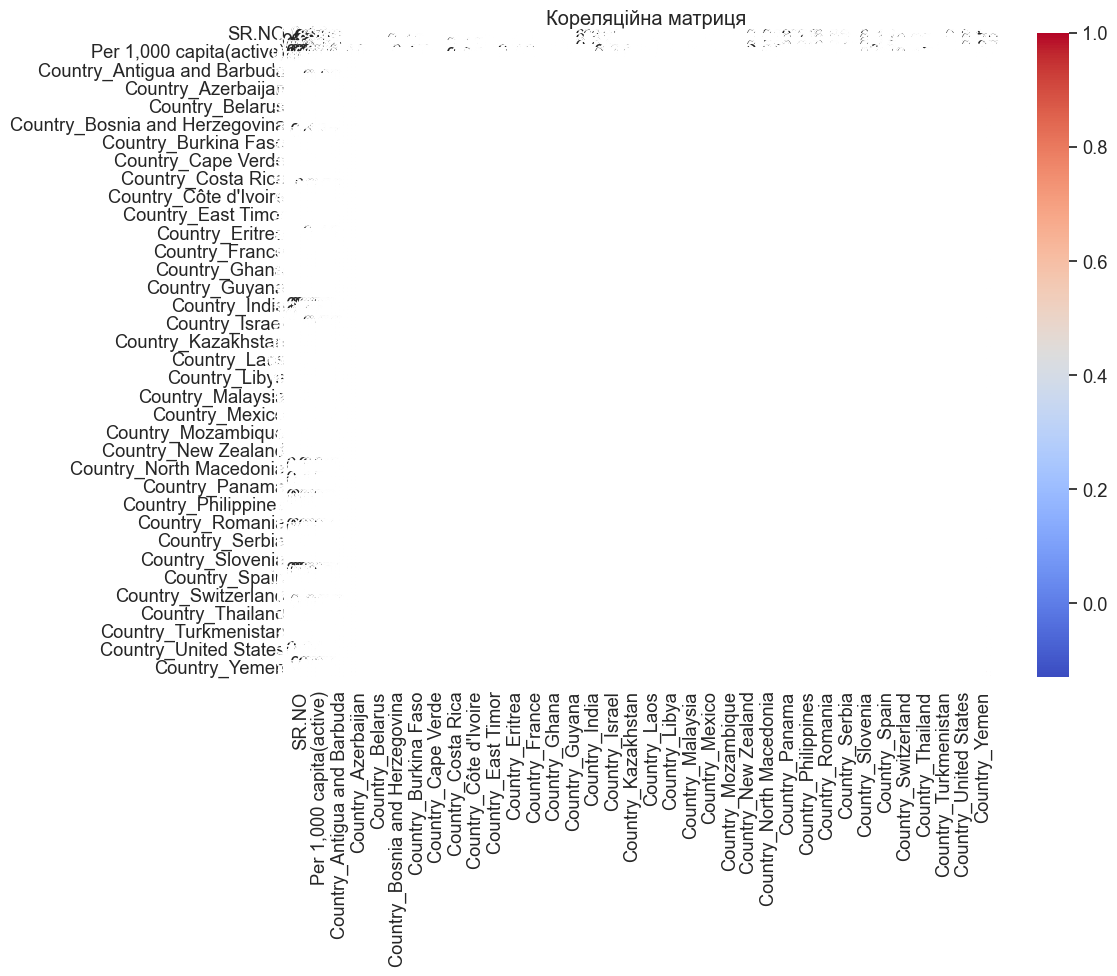

Цільова змінна target_column не знайдена в датасеті. Будь ласка, вкажіть правильну назву.


In [16]:
# Кореляційний аналіз
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Кореляційна матриця')
plt.tight_layout()
plt.show()

# Вибір цільової змінної та ознак
# Замініть 'target_column' на назву вашої цільової змінної
target_column = 'target_column'

# Перевірка наявності цільової змінної в датасеті
if target_column in df_encoded.columns:
    y = df_encoded[target_column]
    X = df_encoded.drop(target_column, axis=1)
    
    # Розділення на навчальну та тестову вибірки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print('Розмір навчальної вибірки:', X_train.shape)
    print('Розмір тестової вибірки:', X_test.shape)
else:
    print(f'Цільова змінна {target_column} не знайдена в датасеті. Будь ласка, вкажіть правильну назву.')

## 5. Описова статистика та візуалізація

In [17]:
# Візуалізація розподілу цільової змінної (якщо вона числова)
if target_column in df_encoded.columns and pd.api.types.is_numeric_dtype(df_encoded[target_column]):
    plt.figure(figsize=(10, 6))
    sns.histplot(df_encoded[target_column], kde=True)
    plt.title(f'Розподіл цільової змінної: {target_column}')
    plt.xlabel(target_column)
    plt.ylabel('Частота')
    plt.grid(True, alpha=0.3)
    plt.show()

# Візуалізація взаємозв'язку між ознаками та цільовою змінною
if target_column in df_encoded.columns:
    # Виберемо топ-5 ознак з найбільшою кореляцією з цільовою змінною
    if pd.api.types.is_numeric_dtype(df_encoded[target_column]):
        correlations = correlation_matrix[target_column].drop(target_column).abs().sort_values(ascending=False)
        top_features = correlations.head(5).index.tolist()
        
        # Створення графіків для топ-5 ознак
        plt.figure(figsize=(15, 10))
        for i, feature in enumerate(top_features, 1):
            plt.subplot(2, 3, i)
            sns.scatterplot(x=df_cleaned[feature], y=df_cleaned[target_column])
            plt.title(f'{feature} vs {target_column}')
            plt.xlabel(feature)
            plt.ylabel(target_column)
            plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

## 6. Побудова моделі

In [18]:
# Побудова моделі лінійної регресії
if target_column in df_encoded.columns and 'X_train' in locals():
    # Створення та навчання моделі
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Прогнозування на тестовій вибірці
    y_pred = model.predict(X_test)
    
    # Оцінка моделі
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print('Середньоквадратична помилка (MSE):', mse)
    print('Коефіцієнт детермінації (R²):', r2)
    
    # Візуалізація прогнозів
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Фактичні значення')
    plt.ylabel('Прогнозовані значення')
    plt.title('Порівняння фактичних і прогнозованих значень')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Аналіз коефіцієнтів моделі
    coefficients = pd.DataFrame({'Ознака': X.columns, 'Коефіцієнт': model.coef_})
    coefficients = coefficients.sort_values(by='Коефіцієнт', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Коефіцієнт', y='Ознака', data=coefficients.head(10))
    plt.title('Топ-10 ознак за значимістю')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## 7. Висновки

У цьому ноутбуці ми провели повний цикл аналізу даних:  

1. Завантажили та вивчили структуру даних  
2. Виконали очищення даних від пропусків та дублікатів  
3. Трансформували дані для аналізу  
4. Провели декомпозицію набору даних  
5. Візуалізували дані для кращого розуміння  
6. Побудували модель лінійної регресії  

Для покращення результатів можна:  

- Спробувати інші алгоритми машинного навчання  
- Виконати більш глибоку інженерію ознак  
- Застосувати методи відбору ознак  
- Налаштувати гіперпараметри моделі  